In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
def parameter_count(model):
  return sum(p.nelement() for p in model.parameters() if p.requires_grad==True)

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)
trainset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
valset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
valloader = DataLoader(valset, batch_size=128, shuffle=False)

In [ ]:
def train(trainloader,valloader, model, criterion, optimizer, device):
    model.train()
    train_loss = 0.0
    train_accuracy = 0.0
    for  images, labels in tqdm(trainloader):
        images = images.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels.to(device))
        loss.backward()
        optimizer.step()
        # accuracy = (output.argmax(dim=1) == labels.to(device)).float().mean()
    train_loss, train_accuracy = validate(trainloader, model, criterion, device)
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    val_loss, val_accuracy = validate(valloader, model, criterion, device)
    print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
    return train_loss, train_accuracy, val_loss, val_accuracy




def validate(loader, model, criterion, device):
  # print('validating')
  model.eval()
  val_loss = 0.0
  val_accuracy = 0.0
  with torch.no_grad():
    for images, labels in loader:
      images, labels = images.to(device), labels.to(device)
      output = model(images)
      loss = criterion(output, labels)
      val_accuracy  += (output.argmax(dim=1) == labels).float().mean().item()
      # print(accuracy)

      val_loss += loss.item()

  # print(val_accuracy, len(loader))
  val_loss /= len(loader)
  val_accuracy /= len(loader)
  # print(f'Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}')
  return val_loss, val_accuracy


def plot(train_loss, train_accuracy, val_loss, val_accuracy, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    epochs = np.arange(10)+1
    ax1.plot(epochs,train_loss, label='Train')
    ax1.plot(epochs, val_loss, label='Val')
    ax1.set_ylabel('Loss')

    ax2.plot(epochs,train_accuracy, label='Train')
    ax2.plot(epochs, val_accuracy, label='Val')
    ax2.set_ylabel('Accuracy')

    fig.suptitle(title)
    plt.legend()
    plt.show()


In [ ]:
class simple_Conv2DModel(nn.Module):
    def __init__(self, bias=True):
        super(simple_Conv2DModel, self).__init__()
        self.bn0 = nn.BatchNorm2d(1)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, bias=bias)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, bias=bias)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, bias=bias)
        self.bn3 = nn.BatchNorm2d(64)

        self.pool = nn.AdaptiveAvgPool2d((7, 7))
        self.fc1 = nn.Linear(64 * 7 * 7, 128, bias=bias)
        self.bn4 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 10, bias=bias)
        self.flatten = nn.Flatten()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.bn0(x)
        x = self.sigmoid(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.sigmoid(x)


        x = self.conv2(x)
        x = self.bn2(x)
        x = self.sigmoid(x)


        x = self.conv3(x)
        x = self.bn3(x)
        x = self.sigmoid(x)
        x = self.pool(x)
        x = self.flatten(x)


        x = self.fc1(x)
        x = self.bn4(x)
        x = self.sigmoid(x)
        x = self.fc2(x)

        return x

426354
At Initialization: Train Loss: 2.3123, Train Accuracy: 0.0975
Epoch 1


100%|██████████| 469/469 [00:16<00:00, 27.69it/s]


Train Loss: 0.2553, Train Accuracy: 0.9508
Val Loss: 0.2513, Val Accuracy: 0.9520
Epoch 2


100%|██████████| 469/469 [00:15<00:00, 30.68it/s]


Train Loss: 0.1058, Train Accuracy: 0.9727
Val Loss: 0.1089, Val Accuracy: 0.9708
Epoch 3


100%|██████████| 469/469 [00:15<00:00, 31.04it/s]


Train Loss: 0.0603, Train Accuracy: 0.9834
Val Loss: 0.0617, Val Accuracy: 0.9835
Epoch 4


100%|██████████| 469/469 [00:15<00:00, 30.61it/s]


Train Loss: 0.0617, Train Accuracy: 0.9816
Val Loss: 0.0633, Val Accuracy: 0.9815
Epoch 5


100%|██████████| 469/469 [00:15<00:00, 30.54it/s]


Train Loss: 1.1932, Train Accuracy: 0.5525
Val Loss: 1.1604, Val Accuracy: 0.5668
Epoch 6


100%|██████████| 469/469 [00:15<00:00, 29.75it/s]


Train Loss: 0.2212, Train Accuracy: 0.9300
Val Loss: 0.2228, Val Accuracy: 0.9295
Epoch 7


100%|██████████| 469/469 [00:15<00:00, 30.94it/s]


Train Loss: 0.1164, Train Accuracy: 0.9652
Val Loss: 0.1244, Val Accuracy: 0.9607
Epoch 8


100%|██████████| 469/469 [00:15<00:00, 29.72it/s]


Train Loss: 0.8774, Train Accuracy: 0.7987
Val Loss: 0.8854, Val Accuracy: 0.7986
Epoch 9


100%|██████████| 469/469 [00:15<00:00, 30.90it/s]


Train Loss: 0.6527, Train Accuracy: 0.8234
Val Loss: 0.6321, Val Accuracy: 0.8307
Epoch 10


100%|██████████| 469/469 [00:15<00:00, 30.16it/s]


Train Loss: 0.0789, Train Accuracy: 0.9735
Val Loss: 0.0921, Val Accuracy: 0.9711


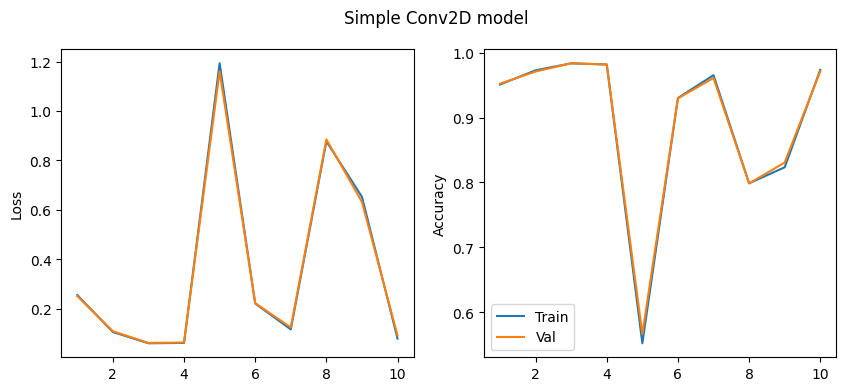

In [ ]:
# bias=False
torch.manual_seed(0)
model = simple_Conv2DModel(bias=False)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
device = torch.device('cuda')
# device = torch.device('cpu')
# device = torch.device('mps')
model = model.to(device)
print(parameter_count(model))
train_loss, train_accuracy = validate(trainloader, model, criterion, device)
print(f'At Initialization: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
t_l = []
t_a = []
v_l = []
v_a = []

for epoch in range(10):
    print(f'Epoch {epoch+1}')
    train_loss, train_accuracy, val_loss, val_accuracy = train(trainloader, valloader, model, criterion, optimizer, device)
    t_l.append(train_loss)
    t_a.append(train_accuracy)
    v_l.append(val_loss)
    v_a.append(val_accuracy)

plot(t_l, t_a, v_l, v_a, 'Simple Conv2D model')


426604
At Initialization: Train Loss: 2.3130, Train Accuracy: 0.0975
Epoch 1


100%|██████████| 469/469 [00:16<00:00, 29.29it/s]


Train Loss: 0.1133, Train Accuracy: 0.9805
Val Loss: 0.1094, Val Accuracy: 0.9792
Epoch 2


100%|██████████| 469/469 [00:15<00:00, 30.46it/s]


Train Loss: 0.0831, Train Accuracy: 0.9796
Val Loss: 0.0844, Val Accuracy: 0.9786
Epoch 3


100%|██████████| 469/469 [00:16<00:00, 28.76it/s]


Train Loss: 0.0679, Train Accuracy: 0.9828
Val Loss: 0.0667, Val Accuracy: 0.9832
Epoch 4


100%|██████████| 469/469 [00:15<00:00, 30.72it/s]


Train Loss: 0.2213, Train Accuracy: 0.9187
Val Loss: 0.2191, Val Accuracy: 0.9189
Epoch 5


100%|██████████| 469/469 [00:16<00:00, 29.24it/s]


Train Loss: 0.0611, Train Accuracy: 0.9832
Val Loss: 0.0672, Val Accuracy: 0.9805
Epoch 6


100%|██████████| 469/469 [00:15<00:00, 30.47it/s]


Train Loss: 0.5343, Train Accuracy: 0.7908
Val Loss: 0.5332, Val Accuracy: 0.7948
Epoch 7


100%|██████████| 469/469 [00:16<00:00, 28.96it/s]


Train Loss: 0.2160, Train Accuracy: 0.9312
Val Loss: 0.2199, Val Accuracy: 0.9270
Epoch 8


100%|██████████| 469/469 [00:15<00:00, 30.96it/s]


Train Loss: 0.3284, Train Accuracy: 0.8906
Val Loss: 0.3200, Val Accuracy: 0.8920
Epoch 9


100%|██████████| 469/469 [00:15<00:00, 29.36it/s]


Train Loss: 0.0438, Train Accuracy: 0.9853
Val Loss: 0.0570, Val Accuracy: 0.9809
Epoch 10


100%|██████████| 469/469 [00:15<00:00, 30.44it/s]


Train Loss: 0.1351, Train Accuracy: 0.9568
Val Loss: 0.1567, Val Accuracy: 0.9514


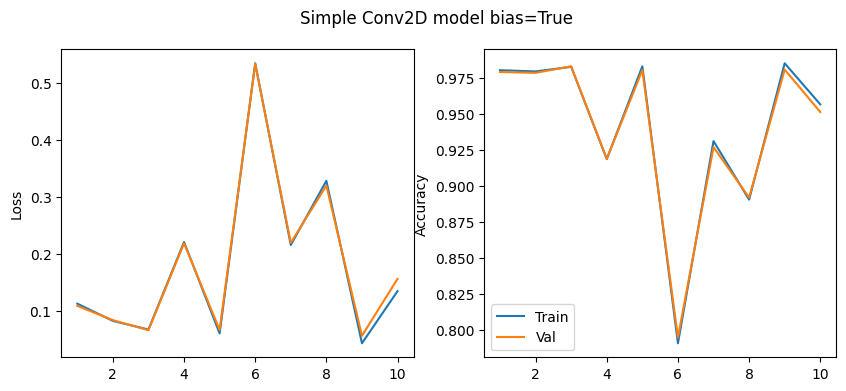

In [ ]:
# bias=True
torch.manual_seed(42)
model = simple_Conv2DModel(bias=True)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
device = torch.device('cuda')
# device = torch.device('cpu')
# device = torch.device('mps')
model = model.to(device)
print(parameter_count(model))
train_loss, train_accuracy = validate(trainloader, model, criterion, device)
print(f'At Initialization: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
t_l = []
t_a = []
v_l = []
v_a = []

for epoch in range(10):
    print(f'Epoch {epoch+1}')
    train_loss, train_accuracy, val_loss, val_accuracy = train(trainloader, valloader, model, criterion, optimizer, device)
    t_l.append(train_loss)
    t_a.append(train_accuracy)
    v_l.append(val_loss)
    v_a.append(val_accuracy)

plot(t_l, t_a, v_l, v_a, 'Simple Conv2D model bias=True')


## Custom Conv2D model with Custom Linear Layers too

In [ ]:
class CustomLinear(nn.Module):
    def __init__(self, input_dim=10, output_dim=20, n_ranges=10, bias=True):
        k = torch.sqrt(torch.tensor(1/input_dim))
        super(CustomLinear, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.n_ranges = n_ranges
        self.bias = bias

        self.weights = nn.ParameterList([
            nn.Parameter(torch.randn(input_dim, output_dim)) for _ in range(n_ranges)
        ])
        for w in self.weights:
          nn.init.kaiming_uniform_(w, 1.0, nonlinearity='sigmoid')
        if self.bias:
            self.bias_weight = nn.ParameterList([
                nn.Parameter(torch.randn(1, output_dim)) for _ in range(n_ranges)
            ])
            for bi in self.bias_weight:
              nn.init.kaiming_uniform_(bi, 1.0, nonlinearity='sigmoid')
            for bi in self.bias_weight:
                bi.register_hook(self._average_gradient_hook)

    def _average_gradient_hook(self, grad):
        n_elements = grad.shape[0]
        return grad/n_elements



    def forward(self, x):
        ranges = torch.arange(self.n_ranges, dtype=x.dtype, device=x.device).view(-1) / self.n_ranges
        # ranges = torch.arange(self.n_ranges, dtype=x.dtype, device=x.device).view(-1) / (self.n_ranges - 1) * 2 - 1
        batch_size = x.size(0)
        output = torch.zeros(batch_size, self.output_dim, device=x.device)

        # x = F.sigmoid(x)
        for idx in range(len(ranges)):

            if idx!=len(ranges)-1:

                range_mask = (x >= ranges[idx]) & (x < ranges[idx+1])
            else:
                range_mask = (x>=ranges[idx])



            if self.bias:
                bias_applied = self.bias_weight[idx]
            else:
                bias_applied=0


            masked_input = x * range_mask.float()

            weighted_input = torch.matmul(masked_input, self.weights[idx])
            output += weighted_input + bias_applied

        return output



In [ ]:
class CustomConv2d(nn.Module):
    def __init__(self, in_channels=3, out_channels=16, kernel_size=3,
                 n_ranges=10,
                 stride=1,
                 padding=0,
                 dilation=1,
                 bias=True):
        super(CustomConv2d, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.n_ranges = n_ranges
        self.stride = stride
        self.padding = padding
        self.dilation = dilation
        self.bias = bias

        # Define a list of weight parameters for each range
        self.weights = nn.ParameterList([
            nn.Parameter(torch.randn(out_channels, in_channels, kernel_size, kernel_size)) for _ in range(n_ranges)
        ])
        for w in self.weights:
            nn.init.kaiming_uniform_(w, a=1.0, nonlinearity='sigmoid')

        if self.bias:
            self.bias_weight = nn.ParameterList([
                nn.Parameter(torch.randn(1, out_channels)) for _ in range(n_ranges)
            ])
            for bi in self.bias_weight:
                nn.init.kaiming_uniform_(bi, a=1.0, nonlinearity='sigmoid')
            for bi in self.bias_weight:
                bi.register_hook(self._average_gradient_hook)

    def _average_gradient_hook(self, grad):
        n_elements = grad.shape[0]
        return grad / n_elements

    def forward(self, x):
        batch_size, _, height, width = x.size()
        # print(batch_size, height, width)
        ranges = torch.arange(self.n_ranges, dtype=x.dtype, device=x.device).view(-1) / self.n_ranges
        H_out = (height+ 2 * self.padding - self.dilation * (self.kernel_size - 1) - 1) // self.stride + 1
        W_out = (width + 2 * self.padding - self.dilation * (self.kernel_size - 1) - 1) // self.stride + 1
        # print(H_out, W_out)
        output = torch.zeros(batch_size, self.out_channels, H_out, W_out, device=x.device)

        # x = F.sigmoid(x)

        for idx in range(len(ranges)):
            if idx != len(ranges) - 1:
                range_mask = (x >= ranges[idx]) & (x < ranges[idx + 1])
            else:
                range_mask = (x >= ranges[idx])

            masked_input = x * range_mask.float()
            # print(range_mask.shape)

            if self.bias:
                bias_applied = self.bias_weight[idx].view(1, -1, 1, 1).expand_as(output)
            else:
                bias_applied = 0


            weighted_input = F.conv2d(masked_input, self.weights[idx], bias=None, stride=self.stride, padding=self.padding)
            output += weighted_input + bias_applied
        # return 0
        return output


In [ ]:
class conv2d_model(nn.Module):
  def __init__(self, in_channels=1, out_dim=10, n_ranges=10, bias=True):
    super(conv2d_model, self).__init__()
    self.bn0 = nn.BatchNorm2d(1)
    self.conv1 = CustomConv2d(in_channels=in_channels, out_channels=16, kernel_size=3, n_ranges=n_ranges, bias=bias)
    self.bn1 = nn.BatchNorm2d(16)
    self.conv2 = CustomConv2d(in_channels=16, out_channels=32, kernel_size=3, n_ranges=n_ranges, bias=bias)
    self.bn2 = nn.BatchNorm2d(32)
    self.conv3 = CustomConv2d(in_channels=32, out_channels=64, kernel_size=3, n_ranges=n_ranges, bias=bias)
    self.bn3 = nn.BatchNorm2d(64)
    self.pool = nn.AdaptiveAvgPool2d((7, 7))

    self.fc1 = CustomLinear(64 * 7 * 7, 128, n_ranges=n_ranges, bias=bias)
    self.bn4 = nn.BatchNorm1d(128)
    self.fc2 = CustomLinear(128, out_dim, n_ranges=n_ranges, bias=bias)
    self.sigmoid = nn.Sigmoid()
  def forward(self, x):
    x = self.bn0(x)
    x = self.sigmoid(x)
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.sigmoid(x)


    x = self.conv2(x)
    x = self.bn2(x)
    x = self.sigmoid(x)


    x = self.conv3(x)
    x = self.bn3(x)
    x = self.sigmoid(x)
    x = self.pool(x)

    x = x.view(x.size(0), -1)


    x = self.fc1(x)
    x = self.bn4(x)
    x = self.sigmoid(x)
    x = self.fc2(x)

    return x

4259202
At Initialization: Train Loss: 3.7922, Train Accuracy: 0.0957
Epoch 1


100%|██████████| 469/469 [00:30<00:00, 15.32it/s]


Train Loss: 2.3246, Train Accuracy: 0.3916
Val Loss: 2.2771, Val Accuracy: 0.4058
Epoch 2


100%|██████████| 469/469 [00:30<00:00, 15.46it/s]


Train Loss: 0.2303, Train Accuracy: 0.9325
Val Loss: 0.2176, Val Accuracy: 0.9359
Epoch 3


100%|██████████| 469/469 [00:30<00:00, 15.27it/s]


Train Loss: 0.1700, Train Accuracy: 0.9486
Val Loss: 0.1636, Val Accuracy: 0.9500
Epoch 4


100%|██████████| 469/469 [00:30<00:00, 15.47it/s]


Train Loss: 0.1148, Train Accuracy: 0.9663
Val Loss: 0.1154, Val Accuracy: 0.9651
Epoch 5


100%|██████████| 469/469 [00:30<00:00, 15.30it/s]


Train Loss: 0.1026, Train Accuracy: 0.9692
Val Loss: 0.1135, Val Accuracy: 0.9656
Epoch 6


100%|██████████| 469/469 [00:30<00:00, 15.44it/s]


Train Loss: 0.0952, Train Accuracy: 0.9719
Val Loss: 0.1063, Val Accuracy: 0.9666
Epoch 7


100%|██████████| 469/469 [00:30<00:00, 15.30it/s]


Train Loss: 0.2246, Train Accuracy: 0.9278
Val Loss: 0.2168, Val Accuracy: 0.9313
Epoch 8


100%|██████████| 469/469 [00:30<00:00, 15.43it/s]


Train Loss: 1.4657, Train Accuracy: 0.5975
Val Loss: 1.3784, Val Accuracy: 0.6152
Epoch 9


100%|██████████| 469/469 [00:30<00:00, 15.45it/s]


Train Loss: 0.2850, Train Accuracy: 0.9002
Val Loss: 0.2969, Val Accuracy: 0.8974
Epoch 10


100%|██████████| 469/469 [00:30<00:00, 15.34it/s]


Train Loss: 0.0466, Train Accuracy: 0.9859
Val Loss: 0.0660, Val Accuracy: 0.9789


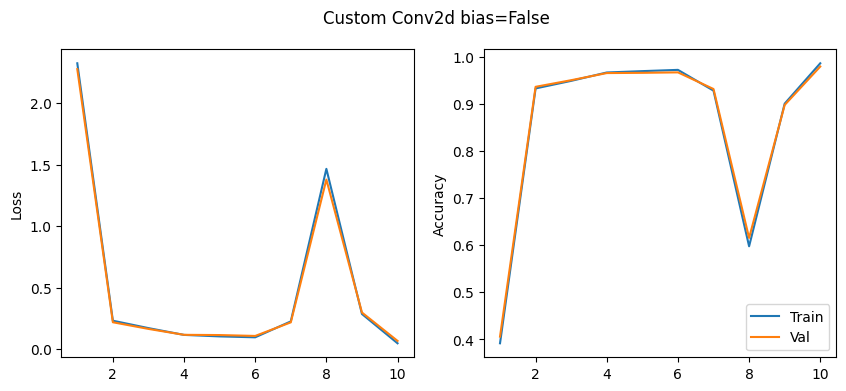

In [ ]:
# bias=False
torch.manual_seed(0)
model = conv2d_model(bias=False)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
device = torch.device('cuda')
# device = torch.device('cpu')
# device = torch.device('mps')
model = model.to(device)
print(parameter_count(model))
train_loss, train_accuracy = validate(trainloader, model, criterion, device)
print(f'At Initialization: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
t_l = []
t_a = []
v_l = []
v_a = []

for epoch in range(10):
    print(f'Epoch {epoch+1}')
    train_loss, train_accuracy, val_loss, val_accuracy = train(trainloader, valloader, model, criterion, optimizer, device)
    t_l.append(train_loss)
    t_a.append(train_accuracy)
    v_l.append(val_loss)
    v_a.append(val_accuracy)

plot(t_l, t_a, v_l, v_a, 'Custom Conv2d bias=False')

4261702
At Initialization: Train Loss: 4.1010, Train Accuracy: 0.1008
Epoch 1


100%|██████████| 469/469 [00:32<00:00, 14.44it/s]


Train Loss: 2.1411, Train Accuracy: 0.3967
Val Loss: 2.0699, Val Accuracy: 0.4125
Epoch 2


100%|██████████| 469/469 [00:32<00:00, 14.45it/s]


Train Loss: 0.3133, Train Accuracy: 0.9037
Val Loss: 0.3085, Val Accuracy: 0.9078
Epoch 3


100%|██████████| 469/469 [00:31<00:00, 14.67it/s]


Train Loss: 0.4522, Train Accuracy: 0.8529
Val Loss: 0.4496, Val Accuracy: 0.8534
Epoch 4


100%|██████████| 469/469 [00:32<00:00, 14.49it/s]


Train Loss: 0.1308, Train Accuracy: 0.9604
Val Loss: 0.1363, Val Accuracy: 0.9579
Epoch 5


100%|██████████| 469/469 [00:32<00:00, 14.50it/s]


Train Loss: 0.1671, Train Accuracy: 0.9458
Val Loss: 0.1720, Val Accuracy: 0.9456
Epoch 6


100%|██████████| 469/469 [00:31<00:00, 14.71it/s]


Train Loss: 0.0881, Train Accuracy: 0.9734
Val Loss: 0.0978, Val Accuracy: 0.9706
Epoch 7


100%|██████████| 469/469 [00:32<00:00, 14.54it/s]


Train Loss: 0.1771, Train Accuracy: 0.9436
Val Loss: 0.1926, Val Accuracy: 0.9394
Epoch 8


100%|██████████| 469/469 [00:32<00:00, 14.48it/s]


Train Loss: 3.4992, Train Accuracy: 0.3199
Val Loss: 3.3331, Val Accuracy: 0.3334
Epoch 9


100%|██████████| 469/469 [00:32<00:00, 14.63it/s]


Train Loss: 0.1200, Train Accuracy: 0.9624
Val Loss: 0.1224, Val Accuracy: 0.9634
Epoch 10


100%|██████████| 469/469 [00:31<00:00, 14.66it/s]


Train Loss: 0.0572, Train Accuracy: 0.9824
Val Loss: 0.0791, Val Accuracy: 0.9739


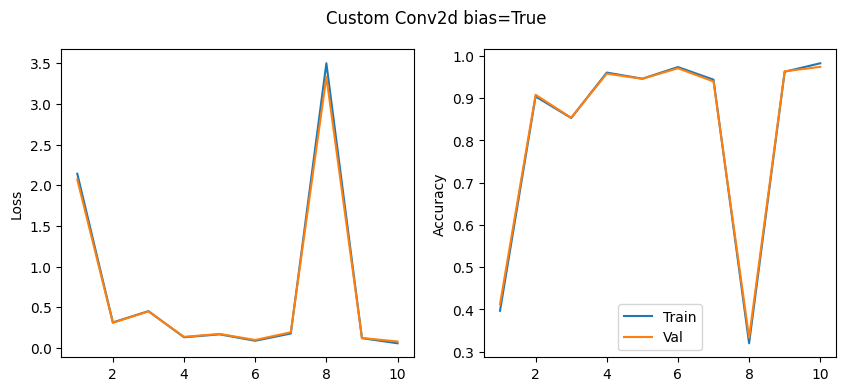

In [ ]:
# bias=True
torch.manual_seed(0)
model = conv2d_model(bias=True)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
device = torch.device('cuda')
# device = torch.device('cpu')
# device = torch.device('mps')
model = model.to(device)
print(parameter_count(model))
train_loss, train_accuracy = validate(trainloader, model, criterion, device)
print(f'At Initialization: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
t_l = []
t_a = []
v_l = []
v_a = []

for epoch in range(10):
    print(f'Epoch {epoch+1}')
    train_loss, train_accuracy, val_loss, val_accuracy = train(trainloader, valloader, model, criterion, optimizer, device)
    t_l.append(train_loss)
    t_a.append(train_accuracy)
    v_l.append(val_loss)
    v_a.append(val_accuracy)

plot(t_l, t_a, v_l, v_a, 'Custom Conv2d bias=True')

## Custom Linear Layers

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim=784, output_dim=10, n_ranges=10, bias=True):
        super(MLP, self).__init__()
        self.bn0 = nn.BatchNorm1d(input_dim)
        self.fc1 = CustomLinear(input_dim, 128, n_ranges=n_ranges, bias=bias)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = CustomLinear(128, 64, n_ranges=n_ranges, bias=bias)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = CustomLinear(64, output_dim, n_ranges=n_ranges, bias=bias)
        self.sigmoid = nn.Sigmoid()
        self.flatten = nn.Flatten()


    def forward(self, x):
        x = self.flatten(x)
        # print('X after flattening: ', x.shape)
        x = self.bn0(x)
        x = self.sigmoid(x)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        return x

1093792
At Initialization: Train Loss: 3.0919, Train Accuracy: 0.1025
Epoch 1


100%|██████████| 469/469 [00:18<00:00, 25.91it/s]


Train Loss: 0.8310, Train Accuracy: 0.7565
Val Loss: 0.8201, Val Accuracy: 0.7602
Epoch 2


100%|██████████| 469/469 [00:20<00:00, 23.09it/s]


Train Loss: 0.4173, Train Accuracy: 0.8825
Val Loss: 0.4197, Val Accuracy: 0.8792
Epoch 3


100%|██████████| 469/469 [00:23<00:00, 19.71it/s]


Train Loss: 0.2920, Train Accuracy: 0.9158
Val Loss: 0.2938, Val Accuracy: 0.9126
Epoch 4


100%|██████████| 469/469 [00:17<00:00, 26.96it/s]


Train Loss: 0.2218, Train Accuracy: 0.9355
Val Loss: 0.2395, Val Accuracy: 0.9267
Epoch 5


100%|██████████| 469/469 [00:18<00:00, 25.47it/s]


Train Loss: 0.1791, Train Accuracy: 0.9479
Val Loss: 0.2089, Val Accuracy: 0.9380
Epoch 6


100%|██████████| 469/469 [00:17<00:00, 27.55it/s]


Train Loss: 0.1557, Train Accuracy: 0.9545
Val Loss: 0.2040, Val Accuracy: 0.9404
Epoch 7


100%|██████████| 469/469 [00:17<00:00, 27.56it/s]


Train Loss: 0.1344, Train Accuracy: 0.9597
Val Loss: 0.1892, Val Accuracy: 0.9421
Epoch 8


100%|██████████| 469/469 [00:17<00:00, 26.31it/s]


Train Loss: 0.1162, Train Accuracy: 0.9640
Val Loss: 0.1894, Val Accuracy: 0.9437
Epoch 9


100%|██████████| 469/469 [00:17<00:00, 26.35it/s]


Train Loss: 0.1030, Train Accuracy: 0.9681
Val Loss: 0.1768, Val Accuracy: 0.9455
Epoch 10


100%|██████████| 469/469 [00:17<00:00, 27.30it/s]


Train Loss: 0.1013, Train Accuracy: 0.9686
Val Loss: 0.1903, Val Accuracy: 0.9448


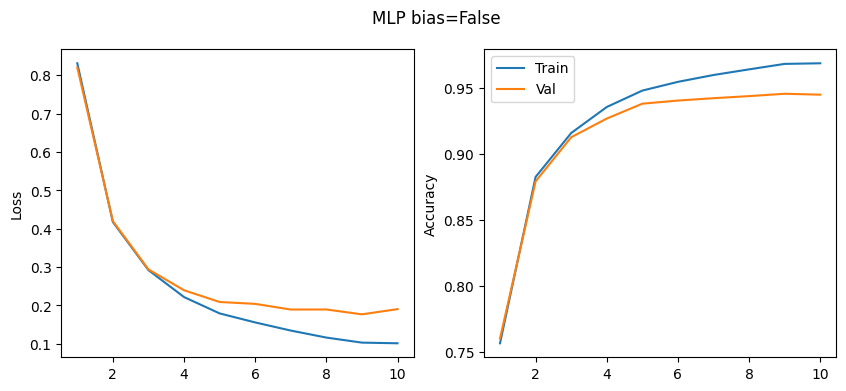

In [ ]:
# bias=False
torch.manual_seed(0)
model = MLP(bias=False)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
device = torch.device('cuda')
# device = torch.device('cpu')
# device = torch.device('mps')
model = model.to(device)
print(parameter_count(model))
train_loss, train_accuracy = validate(trainloader, model, criterion, device)
print(f'At Initialization: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
t_l = []
t_a = []
v_l = []
v_a = []

for epoch in range(10):
    print(f'Epoch {epoch+1}')
    train_loss, train_accuracy, val_loss, val_accuracy = train(trainloader, valloader, model, criterion, optimizer, device)
    t_l.append(train_loss)
    t_a.append(train_accuracy)
    v_l.append(val_loss)
    v_a.append(val_accuracy)

plot(t_l, t_a, v_l, v_a, 'MLP bias=False')

1095812
At Initialization: Train Loss: 3.4515, Train Accuracy: 0.1020
Epoch 1


100%|██████████| 469/469 [00:18<00:00, 25.00it/s]


Train Loss: 0.8823, Train Accuracy: 0.7279
Val Loss: 0.8728, Val Accuracy: 0.7322
Epoch 2


100%|██████████| 469/469 [00:18<00:00, 24.89it/s]


Train Loss: 0.4571, Train Accuracy: 0.8680
Val Loss: 0.4536, Val Accuracy: 0.8671
Epoch 3


100%|██████████| 469/469 [00:18<00:00, 25.05it/s]


Train Loss: 0.3323, Train Accuracy: 0.9032
Val Loss: 0.3383, Val Accuracy: 0.9031
Epoch 4


100%|██████████| 469/469 [00:18<00:00, 26.02it/s]


Train Loss: 0.2531, Train Accuracy: 0.9271
Val Loss: 0.2736, Val Accuracy: 0.9181
Epoch 5


100%|██████████| 469/469 [00:18<00:00, 26.01it/s]


Train Loss: 0.2093, Train Accuracy: 0.9390
Val Loss: 0.2405, Val Accuracy: 0.9291
Epoch 6


100%|██████████| 469/469 [00:18<00:00, 25.26it/s]


Train Loss: 0.1805, Train Accuracy: 0.9480
Val Loss: 0.2226, Val Accuracy: 0.9348
Epoch 7


100%|██████████| 469/469 [00:18<00:00, 24.82it/s]


Train Loss: 0.1309, Train Accuracy: 0.9615
Val Loss: 0.1866, Val Accuracy: 0.9447
Epoch 8


100%|██████████| 469/469 [00:18<00:00, 24.92it/s]


Train Loss: 0.1209, Train Accuracy: 0.9650
Val Loss: 0.1889, Val Accuracy: 0.9421
Epoch 9


100%|██████████| 469/469 [00:18<00:00, 25.99it/s]


Train Loss: 0.1177, Train Accuracy: 0.9641
Val Loss: 0.1933, Val Accuracy: 0.9425
Epoch 10


100%|██████████| 469/469 [00:18<00:00, 25.94it/s]


Train Loss: 0.0986, Train Accuracy: 0.9683
Val Loss: 0.1923, Val Accuracy: 0.9417


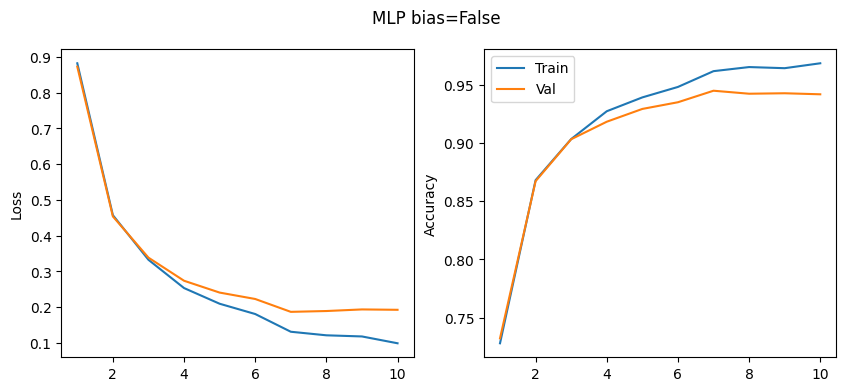

In [ ]:
# bias=True
torch.manual_seed(0)
model = MLP(bias=True)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
device = torch.device('cuda')
# device = torch.device('cpu')
# device = torch.device('mps')
model = model.to(device)
print(parameter_count(model))
train_loss, train_accuracy = validate(trainloader, model, criterion, device)
print(f'At Initialization: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
t_l = []
t_a = []
v_l = []
v_a = []

for epoch in range(10):
    print(f'Epoch {epoch+1}')
    train_loss, train_accuracy, val_loss, val_accuracy = train(trainloader, valloader, model, criterion, optimizer, device)
    t_l.append(train_loss)
    t_a.append(train_accuracy)
    v_l.append(val_loss)
    v_a.append(val_accuracy)

plot(t_l, t_a, v_l, v_a, 'MLP bias=True')

## Simple MLP

In [ ]:
class MLP2(nn.Module):
    def __init__(self, input_dim=784, output_dim=10, bias=True):
        super(MLP2, self).__init__()
        self.bn0 = nn.BatchNorm1d(input_dim)
        self.fc1 = nn.Linear(input_dim, 128, bias=bias)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64, bias=bias)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, output_dim, bias=bias)
        self.sigmoid = nn.Sigmoid()
        self.flatten = nn.Flatten()


    def forward(self, x):
        x = self.flatten(x)
        x = self.bn0(x)
        x = self.sigmoid(x)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.sigmoid(x)
        x = self.fc3(x)
        return x

111338
At Initialization: Train Loss: 2.3750, Train Accuracy: 0.0987
Epoch 1


100%|██████████| 469/469 [00:14<00:00, 31.99it/s]


Train Loss: 0.5052, Train Accuracy: 0.8768
Val Loss: 0.5041, Val Accuracy: 0.8795
Epoch 2


100%|██████████| 469/469 [00:13<00:00, 35.05it/s]


Train Loss: 0.2387, Train Accuracy: 0.9427
Val Loss: 0.2481, Val Accuracy: 0.9391
Epoch 3


100%|██████████| 469/469 [00:13<00:00, 34.54it/s]


Train Loss: 0.3195, Train Accuracy: 0.9018
Val Loss: 0.3295, Val Accuracy: 0.9017
Epoch 4


100%|██████████| 469/469 [00:13<00:00, 34.37it/s]


Train Loss: 0.1536, Train Accuracy: 0.9590
Val Loss: 0.1779, Val Accuracy: 0.9529
Epoch 5


100%|██████████| 469/469 [00:13<00:00, 35.26it/s]


Train Loss: 0.1300, Train Accuracy: 0.9619
Val Loss: 0.1589, Val Accuracy: 0.9528
Epoch 6


100%|██████████| 469/469 [00:13<00:00, 35.08it/s]


Train Loss: 0.2460, Train Accuracy: 0.9208
Val Loss: 0.2772, Val Accuracy: 0.9158
Epoch 7


100%|██████████| 469/469 [00:13<00:00, 35.08it/s]


Train Loss: 0.0973, Train Accuracy: 0.9716
Val Loss: 0.1412, Val Accuracy: 0.9575
Epoch 8


100%|██████████| 469/469 [00:13<00:00, 33.75it/s]


Train Loss: 0.0969, Train Accuracy: 0.9715
Val Loss: 0.1393, Val Accuracy: 0.9589
Epoch 9


100%|██████████| 469/469 [00:13<00:00, 34.37it/s]


Train Loss: 0.0399, Train Accuracy: 0.9889
Val Loss: 0.0843, Val Accuracy: 0.9728
Epoch 10


100%|██████████| 469/469 [00:13<00:00, 34.67it/s]


Train Loss: 0.0935, Train Accuracy: 0.9676
Val Loss: 0.1497, Val Accuracy: 0.9531


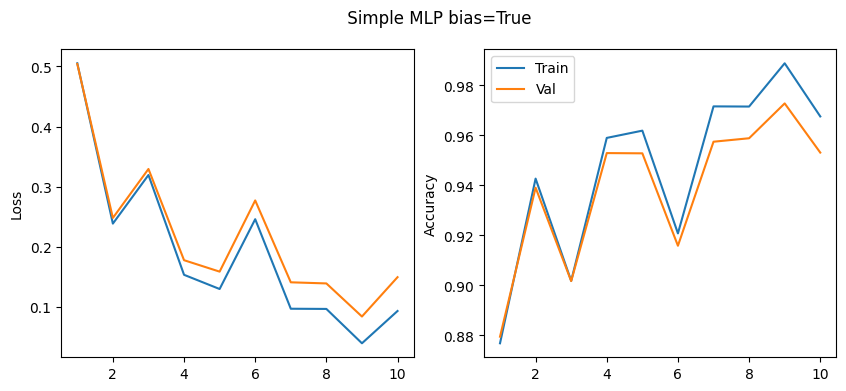

In [ ]:
# bias=True
torch.manual_seed(0)
model = MLP2(bias=True)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
device = torch.device('cuda')
# device = torch.device('cpu')
# device = torch.device('mps')
model = model.to(device)
print(parameter_count(model))
train_loss, train_accuracy = validate(trainloader, model, criterion, device)
print(f'At Initialization: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
t_l = []
t_a = []
v_l = []
v_a = []

for epoch in range(10):
    print(f'Epoch {epoch+1}')
    train_loss, train_accuracy, val_loss, val_accuracy = train(trainloader, valloader, model, criterion, optimizer, device)
    t_l.append(train_loss)
    t_a.append(train_accuracy)
    v_l.append(val_loss)
    v_a.append(val_accuracy)

plot(t_l, t_a, v_l, v_a, ' Simple MLP bias=True')

111136
At Initialization: Train Loss: 2.3337, Train Accuracy: 0.1021
Epoch 1


100%|██████████| 469/469 [00:13<00:00, 35.35it/s]


Train Loss: 0.4713, Train Accuracy: 0.8981
Val Loss: 0.4707, Val Accuracy: 0.8979
Epoch 2


100%|██████████| 469/469 [00:13<00:00, 35.39it/s]


Train Loss: 0.2849, Train Accuracy: 0.9212
Val Loss: 0.2984, Val Accuracy: 0.9129
Epoch 3


100%|██████████| 469/469 [00:13<00:00, 33.91it/s]


Train Loss: 0.2185, Train Accuracy: 0.9449
Val Loss: 0.2372, Val Accuracy: 0.9401
Epoch 4


100%|██████████| 469/469 [00:13<00:00, 35.45it/s]


Train Loss: 0.1791, Train Accuracy: 0.9490
Val Loss: 0.2111, Val Accuracy: 0.9386
Epoch 5


100%|██████████| 469/469 [00:13<00:00, 35.13it/s]


Train Loss: 0.2048, Train Accuracy: 0.9393
Val Loss: 0.2377, Val Accuracy: 0.9326
Epoch 6


100%|██████████| 469/469 [00:13<00:00, 35.13it/s]


Train Loss: 0.1703, Train Accuracy: 0.9440
Val Loss: 0.2071, Val Accuracy: 0.9339
Epoch 7


100%|██████████| 469/469 [00:13<00:00, 35.08it/s]


Train Loss: 0.1960, Train Accuracy: 0.9363
Val Loss: 0.2384, Val Accuracy: 0.9279
Epoch 8


100%|██████████| 469/469 [00:13<00:00, 34.36it/s]


Train Loss: 0.1231, Train Accuracy: 0.9609
Val Loss: 0.1644, Val Accuracy: 0.9512
Epoch 9


100%|██████████| 469/469 [00:13<00:00, 35.04it/s]


Train Loss: 0.0929, Train Accuracy: 0.9697
Val Loss: 0.1398, Val Accuracy: 0.9567
Epoch 10


100%|██████████| 469/469 [00:13<00:00, 35.21it/s]


Train Loss: 0.2018, Train Accuracy: 0.9368
Val Loss: 0.2588, Val Accuracy: 0.9266


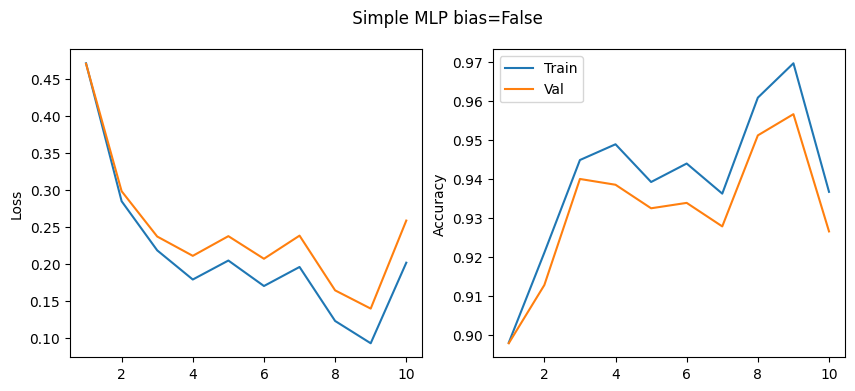

In [ ]:
# bias=False
torch.manual_seed(0)
model = MLP2(bias=False)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
device = torch.device('cuda')
# device = torch.device('cpu')
# device = torch.device('mps')
model = model.to(device)
print(parameter_count(model))
train_loss, train_accuracy = validate(trainloader, model, criterion, device)
print(f'At Initialization: Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
t_l = []
t_a = []
v_l = []
v_a = []

for epoch in range(10):
    print(f'Epoch {epoch+1}')
    train_loss, train_accuracy, val_loss, val_accuracy = train(trainloader, valloader, model, criterion, optimizer, device)
    t_l.append(train_loss)
    t_a.append(train_accuracy)
    v_l.append(val_loss)
    v_a.append(val_accuracy)

plot(t_l, t_a, v_l, v_a, ' Simple MLP bias=False')